# Denoising

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Algorithms

### Past algoritms (histogram, stretching, uniformization)

In [4]:
def compute_hist(img):
    """
    Computes the histogram of an image, i.e. counts the number of           occurences of each values
    ----------
    Input
    img : numpy array
    ----------
    Output
    out : numpy array
    ----------
    """
    out = np.zeros(256) # Specified length
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[int(img[i][j])] += 1
    return out

def stretch(img):
    return 255*((img-img.min())/(img.max()-img.min()))

def uniformization(img):
    hist = compute_hist(img)
    out = np.zeros(img.shape)
    N = out.shape[0] * out.shape[1] # Number of pixels
    for i in range(out.shape[0]):
        for j in range(out.shape[1]):
            out[i][j] = (255/N)*sum(hist[:int(img[i][j])])
    return out

### Add noise function (based on matlab imnoise function)

In [5]:
def add_noise(img, mode):
    """ Adds noise in a grayscaled image.
    Input
    ----------
    img: numpy array
        Input image data. Will be converted to float.
    mode: string
        One of the following strings, selecting the type of noise to        add:

        - 'gauss'   Gaussian-distributed additive noise.
        - 's&p'     Replaces random pixels with 0 or 1. 
    ----------
    Output
    out: numpy array
        Noised image
    """
    if mode == "gauss":
        mean = 0.0   # some constant
        var = 0.02
        std = var**0.5    # some constant (standard deviation)
        noisy_img = img + np.random.normal(mean, std, img.shape)
        noisy_img_clipped = np.clip(noisy_img, 0, 255)
        return noisy_img_clipped
    elif mode == "s&p":
        row, col = img.shape
        s_vs_p = 0.5
        amount = 0.05
        out = np.copy(img)
        # salt mode
        num_salt = np.ceil(amount * img.size * s_vs_p)
        coords = [
            np.random.randint(0, i-1, int(num_salt))
            for i in img.shape
        ]
        out[coords] = 1
        # pepper mode
        num_pepper = np.ceil(amount * img.size * (1. - s_vs_p))
        coords = [
            np.random.randint(0, i-1, int(num_pepper))
            for i in img.shape
        ]
        out[coords] = 0
        return out

### Task 1

Denoising an image using a median filter (processed image from previous project)

In [6]:
def median_filter(img, kernel_size=3, stride=1, padding=1):
    output = np.copy(img)
    border = cv2.copyMakeBorder(
        img,
        top=padding,
        bottom=padding,
        left=padding,
        right=padding,
        borderType=cv2.BORDER_CONSTANT,
        value=0
    )

    for i in range(0, img.shape[0]):
        for j in range(0, img.shape[1]):
             sub_img = border[i:i+kernel_size, j:j+kernel_size].flatten()
             median = np.median(sub_img)
             output[i][j] = median

    return output

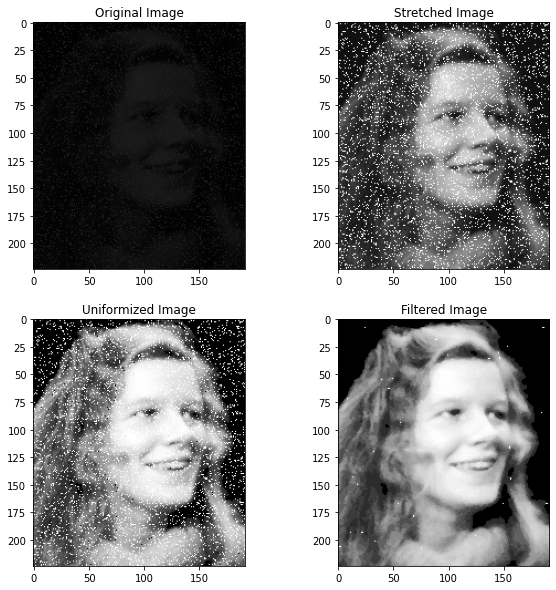

In [8]:
# Load image
img = cv2.imread("./data/histo_imageTest_entree.png")
new_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Stretch image
stretched_img = stretch(new_img)
# Uniformization
uniformized_img = uniformization(stretched_img)
# Apply median filter
filtered_img = median_filter(uniformized_img)
# Display
fig, axs = plt.subplots(2,2, figsize=(10, 10))
axs[0][0].set_title("Original Image")
axs[0][0].imshow(img)
axs[0][1].set_title("Stretched Image")
axs[0][1].imshow(stretched_img, cmap=plt.cm.gray)
axs[1][0].set_title("Uniformized Image")
axs[1][0].imshow(uniformized_img, cmap=plt.cm.gray)
axs[1][1].set_title("Filtered Image")
axs[1][1].imshow(filtered_img, cmap=plt.cm.gray)

plt.show()

### Task 2

**1.** Read an image (either 'lena.gif', 'circuit.tif' or 'cameraman.tif')

**2.** Add a gaussian noise with a null mean and a variance of 4% to the image, and add another 'salt & pepper' noise. Display these images

**3.** Apply a mean (3x3) filter to these two images, display and comment them

**4.** Apply a median filter to these two images, display and comment them

**5.** Compare **3.** and **4.**

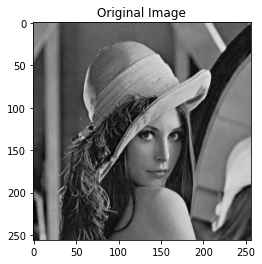

In [9]:
# 1.
original_img = cv2.imread("./data/lena.jpg")
scale_percent = 50 # percent of original size
width = int(original_img.shape[1] * scale_percent / 100)
height = int(original_img.shape[0] * scale_percent / 100) 
original_img = cv2.resize(original_img, dsize=(width, height), interpolation=cv2.INTER_AREA)
plt.title("Original Image")
plt.imshow(original_img)
plt.show()

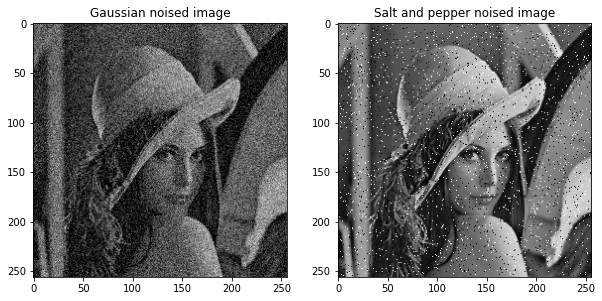

In [11]:
# 2.
tmp_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2GRAY)

gauss_noise_img = add_noise(tmp_img / 255, mode='gauss')
sp_noise_img = add_noise(tmp_img / 255, mode='s&p')

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image")
axs[0].imshow(gauss_noise_img, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image")
axs[1].imshow(sp_noise_img, cmap=plt.cm.gray)
plt.show()

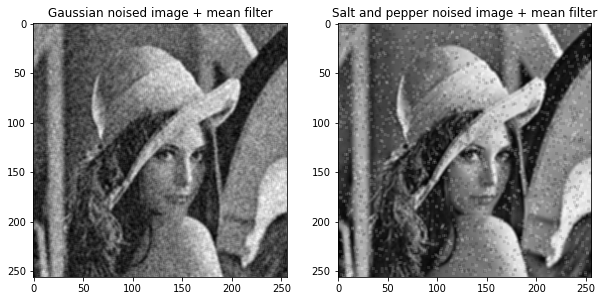

In [13]:
# 3.
kernel = np.ones((3,3),np.float32)/9
gauss_dst1 = cv2.filter2D(gauss_noise_img, -1, kernel)
sp_dst1 = cv2.filter2D(sp_noise_img, -1, kernel)

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image + mean filter")
axs[0].imshow(gauss_dst1, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image + mean filter")
axs[1].imshow(sp_dst1, cmap=plt.cm.gray)
plt.show()

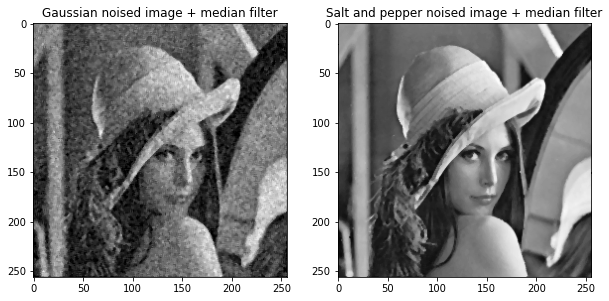

In [14]:
# 4.
gauss_dst2 = median_filter(gauss_noise_img, kernel_size=3, padding=1)
sp_dst2 = median_filter(sp_noise_img, kernel_size=3, padding=1)

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title("Gaussian noised image + median filter")
axs[0].imshow(gauss_dst2, cmap=plt.cm.gray)
axs[1].set_title("Salt and pepper noised image + median filter")
axs[1].imshow(sp_dst2, cmap=plt.cm.gray)
plt.show()

**5.** Median filter is performing really well on the image with salt & pepper noise whereas mean filter is performing around the same for the two images (slightly better on the gaussian noise...)

**6.** Comment on the noise decrease and the quality according to the size of the mean filter, then the choice of the optimal size.

In [15]:
def gen_kernel(size):
    return np.ones((size, size), np.float32)/(size**2)

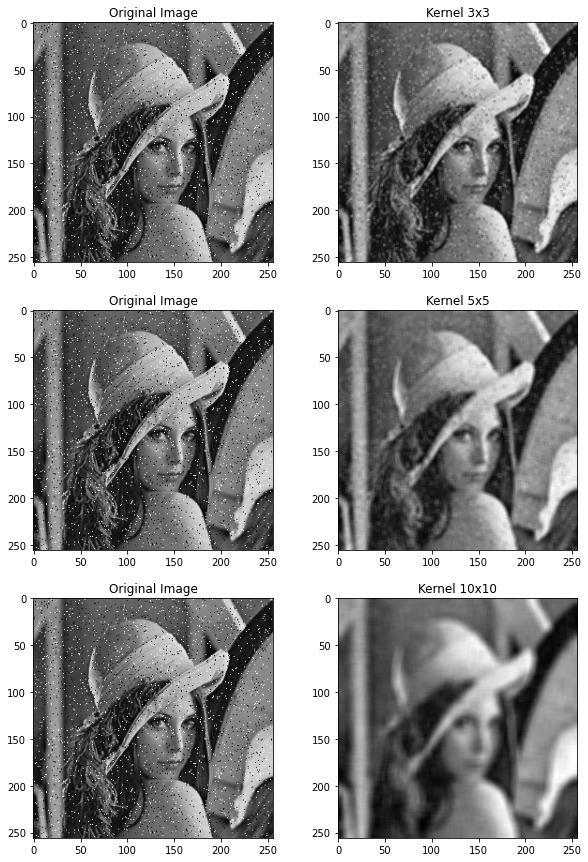

In [16]:
# Image
img = np.copy(sp_noise_img)

output_r3 = cv2.filter2D(img, -1, gen_kernel(3))
output_r5 = cv2.filter2D(img, -1, gen_kernel(5))
output_r10= cv2.filter2D(img, -1, gen_kernel(10))

fig, axs = plt.subplots(3,2, figsize=(10,15))

axs[0][0].set_title("Original Image")
axs[0][0].imshow(img, cmap=plt.cm.gray)
axs[0][1].set_title("Kernel 3x3")
axs[0][1].imshow(output_r3, cmap=plt.cm.gray)
axs[1][0].set_title("Original Image")
axs[1][0].imshow(img, cmap=plt.cm.gray)
axs[1][1].set_title("Kernel 5x5")
axs[1][1].imshow(output_r5, cmap=plt.cm.gray)
axs[2][0].set_title("Original Image")
axs[2][0].imshow(img, cmap=plt.cm.gray)
axs[2][1].set_title("Kernel 10x10")
axs[2][1].imshow(output_r10, cmap=plt.cm.gray)

plt.show()

**Answer** : The higher the kernel size, the more blurred the image would get, but also the less noise there would remain. In this case, 4x4 might be the best size. 